<a href="https://colab.research.google.com/github/Amantaka/Amantaka/blob/main/Project3_OC_Jupiternotebook_012024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trees in Camden
Use this notebook to complete your analysis.
Enter code and comments after the TODOs.

There are some code cells completed for you.  These are highlighted with a <font style="color:crimson;background-color:lemonchiffon">TODO</font> comment.  You can use these to guide the subsequent tasks.  Other cells require you to read documentation or search for answers.  The markdown comments give you links to some useful documentation and articles.  Read the documentation, look at the examples provided in the documentation and then try to apply them to your data.

Remember that you can find information on the pandas functions on the Pandas website https://pandas.pydata.org/pandas-docs/stable/reference/frame.html or directly in the notebook by puttin a ? before or after the function name. for instance: `?df.head()` or `df['Maturity'].value_counts()?`

## Imports
Import the libraries we need to perform the analysis.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

## Task 2: Load Data and Perform Initial Exploration
Load the data from the supplied data files.  The files are in different **file formats**, but Pandas can handle this.

You should read the data in using the appropriate function:

- [pandas.read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)
- [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
- [pandas.read_json](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.read_json.html)

You can then inspect the first few rows of the loaded dataframe:

[pandas.DataFrame.head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)

You can get the number of rows and columns:

[pandas.DataFrame.shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html)

You can get the list of column names:

[pandas.DataFrame.columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html)

And you can list the data types of the columns:

[pandas.DataFrames.dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html)

I've done the first one (loading `"camden_trees.xlsx"`) for you.  Please load `"camden_trees_environmental.csv"` and `"tree_common_names.json"` and analyse them in the same way.


## Google Drive Intergration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/MyDrive/Project3/Data/"

### 2.1 Trees
The file `"camden_trees.xlsx"` is an Excel file, so we use the `read_excel()` function.

In [ ]:
# Create a Pandas dataframe called trees that contains the contents of the Excel file
trees = pd.read_excel(data_path + "camden_trees.xlsx")

We can now inspect the first few rows using `head()`.  By default, `head()` displays the first 5 rows.

In [ ]:
# Display the first few rows
trees.head()

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
0,00060053,1.0,Russell Nurseries Estate,Housing,Vacant Tree Pit,NaT,NaN,NaN,NaN,NaN,E05000135,Hampstead Town,527305,185240,-0.165240,51.551693,"(51.551693, -0.16524)"
1,00057855,1.0,BRECKNOCK JMI (E),Education,Vacant Tree Pit,2019-07-17,2022/2023,NaN,NaN,NaN,E05000131,Cantelowes,529923,184782,-0.127681,51.546984,"(51.546984, -0.127681)"
2,00059953,1.0,Estate 51 Ravenshaw Street,Housing,Ficus carica,NaT,NaN,5.0,4.0,10.0,NaN,NaN,0,0,NaN,NaN,NaN
3,00059915,1.0,ROSARY RC JMI (E),Education,Betula jacquemontii,NaT,NaN,4.0,1.0,6.0,E05000135,Hampstead Town,527249,185261,-0.166051,51.551901,"(51.551901, -0.166051)"
4,00010762,1.0,Holly Lodge Estate,Housing,Ilex x altaclarensis,2017-06-14,2020/2021,14.0,6.0,26.0,E05000137,Highgate,528414,186770,-0.148704,51.565198,"(51.565198, -0.148704)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23439,00057455,1.0,"KILBURN GRANGE, MESSINA AVE (LS)",Parks,Sorbus aria,2017-03-28,2019/2020,2.0,1.0,6.0,E05000140,Kilburn,525130,184418,-0.196884,51.544796,"(51.544796, -0.196884)"
23440,00015494,1.0,OSSULSTON STREET,Highways,Sorbus aria 'Majestica',2019-10-28,2022/2023,12.0,6.0,48.0,E05000143,St Pancras and Somers Town,529758,183095,-0.130667,51.531863,"(51.531863, -0.130667)"
23441,00001693,1.0,BELMONT STREET,Highways,Platanus x hispanica,2017-07-31,2020/2021,18.0,10.0,57.0,E05000136,Haverstock,528302,184457,-0.151163,51.544432,"(51.544432, -0.151163)"
23442,00020342,1.0,Templar House Estate,Housing,Tilia europaea,2018-11-05,2021/2022,20.0,8.0,40.0,E05000132,Fortune Green,524615,184714,-0.204206,51.547573,"(51.547573, -0.204206)"


It's good to understand the size of the dataset we are dealing with.  The `shape` property does this for us.

In [ ]:
# Get the number of rows and columns
trees.shape

(23444, 17)

If there are lots of columns we can't always see all of them in the `head()` list above.  We can use the `columns` property to get a full list:

In [ ]:
# Get a list of all the columns in the dataframe
trees.columns

Index(['Identifier', 'Number Of Trees', 'Site Name', 'Contract Area',
       'Scientific Name', 'Inspection Date', 'Inspection Due Date',
       'Height In Metres', 'Spread In Metres',
       'Diameter In Centimetres At Breast Height', 'Ward Code', 'Ward Name',
       'Easting', 'Northing', 'Longitude', 'Latitude', 'Location'],
      dtype='object')

In order to process the data properly, we should understand the data type for each column.  Pandas attempts to work this out for us, but sometimes we need to give it a bit of a hand.  We can use the `dtypes` property to list the data types.  Note that `object` is Pandas way of saying `string`, i.e. a text data type.

In [ ]:
# List the data types of each column
trees.dtypes

Identifier                                          object
Number Of Trees                                    float64
Site Name                                           object
Contract Area                                       object
Scientific Name                                     object
Inspection Date                             datetime64[ns]
Inspection Due Date                                 object
Height In Metres                                   float64
Spread In Metres                                   float64
Diameter In Centimetres At Breast Height           float64
Ward Code                                           object
Ward Name                                           object
Easting                                              int64
Northing                                             int64
Longitude                                          float64
Latitude                                           float64
Location                                            obje

In [ ]:
trees.describe()

,Number Of Trees,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Easting,Northing,Longitude,Latitude
count,23422.000000,23006.000000,23006.000000,23005.000000,23444.000000,23444.000000,23388.000000,23388.000000
mean,1.100034,10.307029,5.997612,32.595262,526762.518171,184085.188662,-0.155145,51.545115
std,1.288041,6.325293,4.132379,26.149994,25835.857212,9121.059755,0.025058,0.013067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.261719,51.512858
25%,1.000000,5.000000,3.000000,12.000000,526583.750000,183665.000000,-0.175734,51.537472
50%,1.000000,9.000000,5.000000,27.000000,528456.500000,184690.000000,-0.148478,51.546669
75%,1.000000,15.000000,8.000000,46.000000,529369.000000,185481.000000,-0.135978,51.554032
max,67.000000,127.000000,88.000000,228.000000,531514.000000,196188.000000,-0.105858,51.650843


### 2.2 Environmental
The file `"camden_trees_environmental.csv"` is a csv file.  Use the appropriate function to load it into a Pandas DataFrame.

The file "camden_trees_environmental.csv" is a csv file. So we use the pd.read_csv() to read the file. I have named this dataframe "environmental".

In [ ]:
# Create a Pandas dataframe called environmental that contains the contents of the csv file
# TODO
environmental = pd.read_csv(data_path + "camden_trees_environmental.csv" )

In order to see the first few rows of the file we use the function df.head(). By def

In [ ]:
# Display the first few rows
# TODO
environmental.head()

,Identifier,Maturity,Physiological Condition,Tree Set To Be Removed,Removal Reason,Capital Asset Value For Amenity Trees,Carbon Storage In Kilograms,Gross Carbon Sequestration Per Year In Kilograms,Pollution Removal Per Year In Grams
0,00055125,Juvenile,Good,No,NaN,115.07,1.6,0.5,5.7
1,00059429,Middle aged,Fair,No,NaN,7518.08,NaN,NaN,NaN
2,00018254,Mature,Fair,No,NaN,20419.63,426.4,8.8,215.2
3,00027155,Mature,Fair,No,NaN,21447.74,448.3,9.6,379.1
4,00041326,Juvenile,Good,No,NaN,524.30,9.9,1.4,12.8


In order to see the number of rows and columns, we use the df.shape function.

In [ ]:
# Get the number of rows and columns
# TODO
environmental.shape

(23415, 9)

When we have a large number of columns, we use the df.columns to see the names of all the columns.

In [ ]:
# Get a list of all the columns in the dataframe
# TODO
environmental.columns

Index(['Identifier', 'Maturity', 'Physiological Condition',
       'Tree Set To Be Removed', 'Removal Reason',
       'Capital Asset Value For Amenity Trees', 'Carbon Storage In Kilograms',
       'Gross Carbon Sequestration Per Year In Kilograms',
       'Pollution Removal Per Year In Grams'],
      dtype='object')

The function df.dtypes, helps us see the type of variables eacc columns and row contain.

In [ ]:
# List the data types of each column
# TODO
environmental.dtypes

Identifier                                           object
Maturity                                             object
Physiological Condition                              object
Tree Set To Be Removed                               object
Removal Reason                                       object
Capital Asset Value For Amenity Trees               float64
Carbon Storage In Kilograms                         float64
Gross Carbon Sequestration Per Year In Kilograms    float64
Pollution Removal Per Year In Grams                 float64
dtype: object

The function df.describe gives as a summary of statistical information for each column.

In [ ]:
environmental.describe()

,Capital Asset Value For Amenity Trees,Carbon Storage In Kilograms,Gross Carbon Sequestration Per Year In Kilograms,Pollution Removal Per Year In Grams
count,22982.000000,20555.000000,20555.000000,20555.000000
mean,14056.393047,467.465454,8.675057,217.740316
std,24803.806595,844.926555,8.681446,306.751920
min,0.000000,0.500000,0.000000,0.300000
25%,1035.650000,24.800000,2.200000,29.300000
50%,5443.660000,163.900000,6.100000,108.100000
75%,16781.420000,497.300000,11.700000,297.600000
max,504725.720000,6000.000000,53.800000,8223.700000


<hr/>

### 2.3 Common and Scientific Names
The file `"tree_common_names.json"` is a json file.  Use the appropriate function to load it into a Pandas DataFrame.

The file "tree_common_names.json" is a JSON file so we use the pd.read_json function.

In [ ]:
# Create a Pandas dataframe called names that contains the contents of the json file
names = pd.read_json(data_path + "tree_common_names.json")

To see the first few rows we use the df.head() function.

In [ ]:
# Display the first few rows
names.head()

,Scientific Name,Common Name
0,Carpinus betulus Lucas,Hornbeam - European
1,Prunus 'Pandora',Cherry - Ornamental
2,Tilia unidentified species,Lime
3,Rosa unidentified species,None
4,Cedrus libani,Cedar of Lebanon


In order to see the number of rows and columns, we use the df.shape function.

In [ ]:
# Get the number of rows and columns
names.shape

(589, 2)

In [ ]:
# Get a list of all the columns in the dataframe
names.columns

Index(['Scientific Name', 'Common Name'], dtype='object')

The function df.dtypes, helps us see the type of variables eacc columns and row contain.

In [ ]:
# List the data types of each column
names.dtypes

Scientific Name    object
Common Name        object
dtype: object

The function df.describe gives as a summary of statistical information for each column.

In [ ]:
names.describe()

,Scientific Name,Common Name
count,589,565
unique,560,431
top,Cupressocyparis leylandii,Cherry
freq,2,12


<hr/>

### 2.4 Review
At the end of this task you should have a good basic understanding of the contents and overall shape of the different data files.  If you don't, do back and review the outputs above.

## Task 3: Further Inspect the Datasets
The initial inspection gave you a very high-level understanding of the data.  We will now drill a bit deeper and try to understand the data column-by-column.

For columns with a string data type (`object` in Pandas) we have **qualitative** data.  It would be good to know how many *different* values we have in the column, what those values are and the *count* how many of each different value we have.  This will help us understand if the qualitative variable is **binary**, **nominal** or **ordinal**.

For columns with a numeric data type (`int` or `float`) we have **quantitative** data.  Usually integer type variables can the thought of as **discrete** and float type variables can be thought of as **continuous**.  It would be good to know some summary descriptive statistics for these columns.   

If you are unsure of what these different data classifications mean, read this:

[Types of Variables](https://openclassrooms.com/en/courses/6037301-perform-an-initial-data-analysis/6051886-discover-the-four-variable-types)

You can get the list of values and counts for a column using this function:

[pandas.Series.value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

You can get the descriptive statistics for a DataFrame using this function:

[pandas.DataFrame.describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

Note that Pandas may treat integer columns as floats if there are null values in the columns.  So if you see a float data type it might be worth checking the actual values to confirm if it really is a float or if it really is an int with nulls.  You can check the actual values with:

[pandas.Series.unique](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html)



### 3.1 Further Inspect the Trees Dataset
Let's start with the trees dataset.


#### 3.1.a Counts of Values for String Types Columns
Go through each column that is a string (object) type and count the number of rows for each value in the column.  After each one, classify the data as binary, nominal or ordinal using a markdown comment.

I've done the first one for you.


**Site Name**

In [ ]:
# List of values in Site Name column and their counts
trees["Site Name"].value_counts()

WATERLOW PARK (LS)                         920
Alexandra & Ainsworth Estate               289
Belsize nature reserve, Russell Nursery    278
Holly Lodge Estate                         272
LINCOLN'S INN FIELDS, GARDENS (LS)         193
                                          ... 
GOLDINGTON CRESCENT                          1
ALLCROFT ROAD                                1
WOBURN WALK, LAND BEHIND 4-18                1
KILBURN PRIORY                               1
GOODGE PLACE                                 1
Name: Site Name, Length: 1135, dtype: int64

Site Name is **qualitative nominal**.

Site Name is qualitative nominal.Now do the same on the other string columns.  Use `value_counts()` and then classify as binary, ordered or unordered using a markdown comment.  As you do each one, stop and look at the values and counts and think about how the data in the column might be useful for supporting the council's initiatives.  Don't just treat this as a mechanical copy/paste task. The objective is, after all, to get really intimate with the data!

In [ ]:
# List of values in Contract Area column and their counts
trees["Contract Area"].value_counts()

Highways              10062
Housing                7500
Parks                  4330
Education              1288
Corporate Landlord      264
Name: Contract Area, dtype: int64

The Contract Area is **qualitative nomina**l data.

In [ ]:
# List of values in Scientific Name column and their counts
trees["Scientific Name"].value_counts()

Platanus x hispanica                                 3340
Tilia europaea                                       1468
Acer pseudoplatanus                                   941
Betula pendula                                        765
Fraxinus excelsior                                    754
                                                     ... 
Vacant Tree Pit (planned: Populus tremula)              1
Liriodendron fastigiata                                 1
Sequoia sempervirens                                    1
Sorbus x hybrida                                        1
Vacant Tree Pit (planned: Acer rubrum 'Amstrong')       1
Name: Scientific Name, Length: 543, dtype: int64

The Scientific name is **qualitative nominal** data.

In [ ]:
# List of values in Inspection Due Date column and their counts
trees["Inspection Due Date"].value_counts()

2022/2023    7921
2021/2022    7353
2020/2021    6577
2019/2020    1157
2018/2019      16
2017/2018       5
2016/2017       4
2001/2002       4
2003/2004       2
2006/2007       1
2012/2013       1
2013/2014       1
2011/2012       1
Name: Inspection Due Date, dtype: int64

The Inspection due data is **qualitative ordina**l data.

In [ ]:
# List of values in Ward Code column and their counts
trees["Ward Code"].value_counts()

E05000137    2799
E05000143    1832
E05000134    1541
E05000140    1540
E05000139    1463
E05000136    1424
E05000135    1340
E05000138    1293
E05000132    1284
E05000131    1231
E05000133    1229
E05000129    1008
E05000142     989
E05000144     978
E05000130     899
E05000145     853
E05000141     824
E05000128     691
Name: Ward Code, dtype: int64

The Ward code is **qualitative nominal** data.

In [ ]:
# List of values in Ward Name column and their counts
trees["Ward Name"].value_counts()

Highgate                          2799
St Pancras and Somers Town        1832
Gospel Oak                        1541
Kilburn                           1540
Kentish Town                      1463
Haverstock                        1424
Hampstead Town                    1340
Holborn and Covent Garden         1293
Fortune Green                     1284
Cantelowes                        1231
Frognal and Fitzjohns             1229
Bloomsbury                        1008
Regent's Park                      989
Swiss Cottage                      978
Camden Town with Primrose Hill     899
West Hampstead                     853
King's Cross                       824
Belsize                            691
Name: Ward Name, dtype: int64

The ward code is **qualitative nominal** data.

In [ ]:
# List of values in Location column and their counts
trees["Location"].value_counts()

(51.556205, -0.173776)    3
(51.553475, -0.152668)    3
(51.548133, -0.144922)    2
(51.544482, -0.144465)    2
(51.55468, -0.164744)     2
                         ..
(51.525312, -0.128846)    1
(51.540297, -0.181512)    1
(51.556013, -0.211326)    1
(51.55969, -0.182457)     1
(51.552397, -0.173397)    1
Name: Location, Length: 23262, dtype: int64

The location is **qualitative nominal** data.

#### 3.1.b Descriptive Stats for Numeric Type Columns
Use the `describe()` function to get the descriptive stats for the numeric columns.

For each column, classify the column as discrete or continuous (use the data type to guide you, but check any floats to confirm whether they are really floats or just ints with null values.  Use `pandas.Series.unique()` to check this).


In [ ]:
          # Get the descriptive stats for the numeric columns
trees.describe()

,Number Of Trees,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Easting,Northing,Longitude,Latitude
count,23422.000000,23006.000000,23006.000000,23005.000000,23444.000000,23444.000000,23388.000000,23388.000000
mean,1.100034,10.307029,5.997612,32.595262,526762.518171,184085.188662,-0.155145,51.545115
std,1.288041,6.325293,4.132379,26.149994,25835.857212,9121.059755,0.025058,0.013067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.261719,51.512858
25%,1.000000,5.000000,3.000000,12.000000,526583.750000,183665.000000,-0.175734,51.537472
50%,1.000000,9.000000,5.000000,27.000000,528456.500000,184690.000000,-0.148478,51.546669
75%,1.000000,15.000000,8.000000,46.000000,529369.000000,185481.000000,-0.135978,51.554032
max,67.000000,127.000000,88.000000,228.000000,531514.000000,196188.000000,-0.105858,51.650843


In [ ]:
trees.dtypes

Identifier                                          object
Number Of Trees                                    float64
Site Name                                           object
Contract Area                                       object
Scientific Name                                     object
Inspection Date                             datetime64[ns]
Inspection Due Date                                 object
Height In Metres                                   float64
Spread In Metres                                   float64
Diameter In Centimetres At Breast Height           float64
Ward Code                                           object
Ward Name                                           object
Easting                                              int64
Northing                                             int64
Longitude                                          float64
Latitude                                           float64
Location                                            obje

<hr/>

Find out if floats are really floats or ints with nulls.
>

In [ ]:
trees['Number Of Trees'].unique()



array([ 1.,  2.,  3.,  0., nan,  5.,  6.,  7., 18.,  8., 65.,  4., 10.,
        9., 11., 50., 12., 15., 52., 40., 33., 13., 20., 67., 21., 32.,
       24., 26., 16., 25., 51.])

Number of tress is **discrete** data.

In [ ]:
trees['Height In Metres'].unique()

array([  nan,   5. ,   4. ,  14. ,   9. ,   0. ,   2. ,   2.5,   8. ,
        13. ,  17. ,  10. ,   3. ,  19. ,   7. ,   6. ,   1.8,  15. ,
        12. ,   1.5,  16. ,  20. ,  21. ,  24. ,  25. ,   2.7,  18. ,
        11. ,  26. ,  22. ,   0.5,  16.1,  27. ,  28. ,   2.3,  22.3,
        38. ,  15.5,  29. ,  23. ,  34. ,   3.5,   2.6,   1. ,   5.5,
        22.5,   2.2,  36. ,  31. ,  96. ,  13.6, 127. ,  14.7,   4.5,
        30. ,  35. ,  32. ,   9.4,  11.8,  33. ,  40. ,   2.1,   6.5,
        41. ,  23.1,  37. ,  39. ,  12.5,   7.5,  13.7,  31.6,  23.8,
         0.2,  12.3,  15.7,   6.8,   9.3,   3.8,  24.9,  17.4,   2.8,
         3.2,  13.9,  12.4,  10.2,  10.8,  24.5,  30.4,   9.8,  11.4,
        23.4,   3.7,  11.6,   7.7,   8.3,   3.6,  17.5,  19.5])

Height in meters is **continuous**.

In [ ]:
trees['Spread In Metres'].unique()

array([  nan,  4.  ,  1.  ,  6.  ,  7.  ,  0.  ,  1.5 ,  5.  ,  9.  ,
       10.  ,  3.  ,  2.  , 13.  ,  2.5 , 12.  , 15.  , 14.  ,  8.  ,
       11.  ,  0.6 ,  1.8 , 17.  , 20.  , 18.  , 16.  , 22.  , 19.  ,
        5.5 , 26.  ,  1.4 , 23.  , 21.  , 28.  ,  1.2 ,  0.5 ,  3.5 ,
       24.  ,  1.3 ,  1.6 , 30.  ,  1.7 , 27.  ,  4.2 , 11.02,  0.7 ,
        6.5 ,  4.5 , 31.  , 25.  ,  0.8 ,  0.3 ,  2.2 ,  2.8 ,  1.65,
       29.  , 88.  ])

Spread in meters is continuous.

In [ ]:
trees['Diameter In Centimetres At Breast Height'].unique()

array([  nan,  10. ,   6. ,  26. ,  29. ,   5. ,   0. ,   4. ,  12. ,
        59. ,  52. ,  23. ,  50. ,  63. ,  15. ,   3. ,  49. ,  42. ,
        14. ,  19. ,   9. ,  70. ,  32. ,  28. ,  34. ,  20. ,  17. ,
        27. ,  37. ,   8. ,  45. ,  18. , 119. ,   7. ,  38. ,  55. ,
        41. ,  75. ,  31. ,  25. ,  11. ,  30. ,  43. ,  68. ,  92. ,
        16. ,  35. ,  58. ,  72. ,  64. ,  13. ,  61. ,  69. ,  33. ,
        47. ,  67. , 109. , 106. ,  24. ,  51. ,  40. ,  22. ,  60. ,
        39. ,  46. ,  57. ,  21. ,  54. , 117. ,  44. ,  82. , 114. ,
        65. ,  84. , 118. ,   1. ,  89. ,  53. ,  36. ,  93. ,  88. ,
        86. , 163. ,  66. ,  81. ,  74. , 100. ,  48. ,  73. ,  95. ,
       129. ,  62. ,  85. ,  56. ,   3.5, 161. ,  71. , 105. , 102. ,
        80. ,  87. , 101. ,  76. , 113. , 108. , 160. , 132. ,  90. ,
       145. , 130. ,  79. , 228. , 110. ,  83. ,  78. , 122. , 170. ,
       115. ,   2. ,  77. , 107. ,  96. , 126. ,  91. , 104. , 158. ,
        99. ,  94. ,

Diameter in centimeters at breast height is **continuous.**

In [ ]:
trees['Longitude'].unique()

array([-0.16524 , -0.127681,       nan, ..., -0.196884, -0.204206,
       -0.173397])

Longitude is **continuous.**

In [ ]:
trees['Latitude'].unique()

array([51.551693, 51.546984,       nan, ..., 51.54329 , 51.545726,
       51.531863])

Latitude is continuous.


ENTER AS MARKDOWN HERE

<hr/>

### 3.2 Further Inspect the Environmental Dataset
Now repeat the above for the environmental dataset.

#### 3.2.a Counts of Values for String Type Columns
For each string column in the environmental dataset show the counts of the unique values.

In [ ]:
environmental['Identifier'].value_counts()

00055125    1
00001681    1
00008539    1
00019552    1
00032062    1
           ..
00013724    1
00005978    1
00017336    1
00014229    1
00001786    1
Name: Identifier, Length: 23415, dtype: int64

Identifier is qualitative nominal.

In [ ]:
environmental['Maturity'].value_counts()

Mature            10225
Middle aged        7779
Juvenile           4393
Not Applicable      377
Over Mature         191
Veteran              41
Name: Maturity, dtype: int64

Maturity is **qualitative ordinal**

In [ ]:
environmental['Physiological Condition'].value_counts()

Good              12910
Fair               9183
Poor                357
Not applicable      249
Dead                236
Excellent             8
Name: Physiological Condition, dtype: int64

Physiological Condition is **qualitative ordinal**.

In [ ]:
environmental['Tree Set To Be Removed'].value_counts()

No     23331
Yes       84
Name: Tree Set To Be Removed, dtype: int64

Tree Set To Be Removed is **qualitative binary**.

In [ ]:
environmental['Removal Reason'].value_counts()

Dead, dying                    30
Basal decay                    17
Trunk decay                    10
Tree defect                     5
Crown die-back                  5
Dog damage                      3
Unsuitable location             3
Newly planted tree failure      2
Coppiced stump                  1
Touching building/structure     1
Crown decay                     1
Split trunk                     1
Broken/split branch             1
Climber                         1
No defects - work required      1
Suppressed                      1
ATRD                            1
Name: Removal Reason, dtype: int64

Removal reason is **qualitative nominal**

<hr/>

#### 3.2.b Descriptive Stats for Numeric Type Columns
For each numeric column in the environmental dataset show the descriptive stats

In [ ]:
environmental.describe()

,Capital Asset Value For Amenity Trees,Carbon Storage In Kilograms,Gross Carbon Sequestration Per Year In Kilograms,Pollution Removal Per Year In Grams
count,22982.000000,20555.000000,20555.000000,20555.000000
mean,14056.393047,467.465454,8.675057,217.740316
std,24803.806595,844.926555,8.681446,306.751920
min,0.000000,0.500000,0.000000,0.300000
25%,1035.650000,24.800000,2.200000,29.300000
50%,5443.660000,163.900000,6.100000,108.100000
75%,16781.420000,497.300000,11.700000,297.600000
max,504725.720000,6000.000000,53.800000,8223.700000


In [ ]:
environmental.dtypes

Identifier                                           object
Maturity                                             object
Physiological Condition                              object
Tree Set To Be Removed                               object
Removal Reason                                       object
Capital Asset Value For Amenity Trees               float64
Carbon Storage In Kilograms                         float64
Gross Carbon Sequestration Per Year In Kilograms    float64
Pollution Removal Per Year In Grams                 float64
dtype: object

In [ ]:
environmental['Capital Asset Value For Amenity Trees'].unique()

array([1.1507000e+02, 7.5180800e+03, 2.0419630e+04, ..., 3.3664130e+04,
       3.6269450e+04, 1.4801215e+05])

Capital Asset Value For Amenity Trees is **quantitative continuous**.

In [ ]:
environmental['Carbon Storage In Kilograms'].unique()

array([1.6000e+00,        nan, 4.2640e+02, ..., 4.7233e+03, 3.7305e+03,
       4.8100e+02])

Carbon Storage In Kilograms is **quantitative continuous**

In [ ]:
environmental['Gross Carbon Sequestration Per Year In Kilograms'].unique()

array([ 0.5,  nan,  8.8,  9.6,  1.4, 10.1,  0.8,  7.9, 24.2,  2.4,  0.9,
        3. , 14.6,  8.1,  4.1,  1.8, 18.8, 24.4, 13.4,  4.3,  6.5,  1.3,
        0.6,  2.5, 13.1,  2.1,  3.9, 15.9,  1. ,  6.6,  0.4,  3.4,  2.9,
       28.7,  0.7,  1.5, 12.5, 25.4, 11.2,  9. , 23.9,  4.4, 11.5, 11. ,
        8.4, 10.9, 10.7,  6.9,  7. ,  3.8,  3.2,  6.1,  8.6, 30.2,  3.7,
       15. , 30.4,  7.6, 20.1, 10.2,  8.3, 39.9,  0.3,  4.9, 14.3, 13.5,
       16.7,  8.9,  1.6,  4.2,  3.6,  4. ,  6.7,  0.1, 19.7, 24.6,  6.4,
        5.4,  5.9, 12.2,  7.3, 13. ,  7.1, 36.9,  9.3, 18.2, 10. ,  4.7,
        5. , 29.8, 17.8, 18.5, 17.6,  7.2,  4.8,  5.6,  5.3, 10.5, 12.9,
        9.4,  7.8,  1.1, 19.2, 37.3,  2.7, 12.8, 17. , 15.5, 27.6, 34.2,
        5.7,  5.8, 17.3, 20.4,  9.9, 15.6,  7.4, 11.8,  9.2,  2.6, 21.7,
       11.3, 10.8, 29.4, 23.1, 26.5,  1.2, 10.6, 33.6, 23.6, 11.7, 17.4,
       15.1, 16.6,  2.3, 13.3, 16.3, 18.3, 10.4, 19. ,  1.7,  3.3, 14.1,
        5.5, 12.6, 14.5,  3.5,  8.7, 36.6, 17.7,  5

Gross Carbon Sequestration Per Year In Kilograms is **quantitative continuous**.

In [ ]:
environmental['Pollution Removal Per Year In Grams'].unique()

array([  5.7,   nan, 215.2, ...,   8. , 399.9,  60.1])

Pollution Removal Per Year In Grams is **quantitative continuous**.

<hr/>

### 3.3 Further Inspect the Common Names Dataset
Now repeat the above for the common names dataset.

#### 3.3.a (Names) Counts of Values for String Type Columns
For each string column in the common names dataset show the counts of the unique values.




In [ ]:
names['Scientific Name'].value_counts()

Cupressocyparis leylandii                             2
Larix decidua                                         2
Salix fragilis                                        2
Alnus cordata                                         2
Populus nigra                                         2
                                                     ..
Pyrus salicifolia 'Pendula'                           1
Chamaecyparis lawsoniana 'unid                        1
Platanus x hispanica Tremonia                         1
Vacant Tree Pit (planned: Gymnocladus dioicus)        1
Vacant Tree Pit (planned: Liquidambar styraciflua)    1
Name: Scientific Name, Length: 560, dtype: int64

Scientific Name is qualitative nominal.

In [ ]:
names['Common Name'].value_counts()

Cherry                         12
Rowan                          10
Magnolia                       10
Vacant Tree Pit (planned: )    10
Apple - Crab                    9
                               ..
Pittosporum                     1
Birch - Purple                  1
Maple - Column Norway           1
Maple - Crimson King Norway     1
Castlewellan gold               1
Name: Common Name, Length: 431, dtype: int64

Common name is qualitative nominal.

<hr/>


#### 3.3.b (Names) Descriptive Stats for Numeric Type Columns
There are no numeric columns.

## Task 4: Identify Missing Values
Find the number of missing values in each column.  Missing values can indicate data quality issues.  Missing are nulls in our data.  But sometimes zero values indicate missing values.  For example, a zero value for a tree height is clearly not a valid valid, so should be considered missing.

Use these functions to find rows that have missing and zero values:

- [pandas.DataFrame.isnull](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html)
- [pandas.DataFrame.isin](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html)
- [pandas.DataFrame.mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)
- [pandas.DataFrame.sum](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

As you go through this task, think about the possible impact of the missing values on the ability of the data to deliver on the council's initiatives.  There is no absolute answer to "how many missing values is too many".  It depends on the context of what you intend to do with the data.  Try to make an interpretation based on your understanding of the requirements.

### 4.1 Missing Values for the Trees Dataset
I've shown you how to do this for the trees dataset.

In [ ]:
# Percentage of null values
trees.isnull().mean()*100

Identifier                                  0.000000
Number Of Trees                             0.093841
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             1.710459
Inspection Due Date                         1.710459
Height In Metres                            1.868282
Spread In Metres                            1.868282
Diameter In Centimetres At Breast Height    1.872547
Ward Code                                   0.963999
Ward Name                                   0.963999
Easting                                     0.000000
Northing                                    0.000000
Longitude                                   0.238867
Latitude                                    0.238867
Location                                    0.238867
dtype: float64

In [ ]:
# Number of null values
trees.isnull().sum()

Identifier                                    0
Number Of Trees                              22
Site Name                                     0
Contract Area                                 0
Scientific Name                               0
Inspection Date                             401
Inspection Due Date                         401
Height In Metres                            438
Spread In Metres                            438
Diameter In Centimetres At Breast Height    439
Ward Code                                   226
Ward Name                                   226
Easting                                       0
Northing                                      0
Longitude                                    56
Latitude                                     56
Location                                     56
dtype: int64

In [ ]:
# Percentage of zero values
trees.isin([0]).mean()*100

Identifier                                  0.000000
Number Of Trees                             0.396690
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             0.000000
Inspection Due Date                         0.000000
Height In Metres                            0.733663
Spread In Metres                            1.181539
Diameter In Centimetres At Breast Height    1.164477
Ward Code                                   0.000000
Ward Name                                   0.000000
Easting                                     0.238867
Northing                                    0.238867
Longitude                                   0.000000
Latitude                                    0.000000
Location                                    0.000000
dtype: float64

In [ ]:
# Number of zero values
trees.isin([0]).sum()

Identifier                                    0
Number Of Trees                              93
Site Name                                     0
Contract Area                                 0
Scientific Name                               0
Inspection Date                               0
Inspection Due Date                           0
Height In Metres                            172
Spread In Metres                            277
Diameter In Centimetres At Breast Height    273
Ward Code                                     0
Ward Name                                     0
Easting                                      56
Northing                                     56
Longitude                                     0
Latitude                                      0
Location                                      0
dtype: int64

In [ ]:
# Percentage of null and zero values
(trees.isnull().sum() + trees.isin([0]).sum())/trees.shape[0]

Identifier                                  0.000000
Number Of Trees                             0.004905
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             0.017105
Inspection Due Date                         0.017105
Height In Metres                            0.026019
Spread In Metres                            0.030498
Diameter In Centimetres At Breast Height    0.030370
Ward Code                                   0.009640
Ward Name                                   0.009640
Easting                                     0.002389
Northing                                    0.002389
Longitude                                   0.002389
Latitude                                    0.002389
Location                                    0.002389
dtype: float64

In [ ]:
# Number of null and zero values
(trees.isnull().sum() + trees.isin([0]).sum())

Identifier                                    0
Number Of Trees                             115
Site Name                                     0
Contract Area                                 0
Scientific Name                               0
Inspection Date                             401
Inspection Due Date                         401
Height In Metres                            610
Spread In Metres                            715
Diameter In Centimetres At Breast Height    712
Ward Code                                   226
Ward Name                                   226
Easting                                      56
Northing                                     56
Longitude                                    56
Latitude                                     56
Location                                     56
dtype: int64

### 4.2 Missing Values for the Environmental Dataset
Now repeat the missing values check for the environmental dataset.



In [ ]:
# Percentage of null values
environmental.isnull().mean()*100

Identifier                                           0.000000
Maturity                                             1.746744
Physiological Condition                              2.015802
Tree Set To Be Removed                               0.000000
Removal Reason                                      99.641256
Capital Asset Value For Amenity Trees                1.849242
Carbon Storage In Kilograms                         12.214392
Gross Carbon Sequestration Per Year In Kilograms    12.214392
Pollution Removal Per Year In Grams                 12.214392
dtype: float64

In [ ]:
# Number of null values
environmental.isnull().sum()

Identifier                                              0
Maturity                                              409
Physiological Condition                               472
Tree Set To Be Removed                                  0
Removal Reason                                      23331
Capital Asset Value For Amenity Trees                 433
Carbon Storage In Kilograms                          2860
Gross Carbon Sequestration Per Year In Kilograms     2860
Pollution Removal Per Year In Grams                  2860
dtype: int64

In [ ]:
# Percentage of zero values
environmental.isin([0]).mean()*100

Identifier                                          0.000000
Maturity                                            0.000000
Physiological Condition                             0.000000
Tree Set To Be Removed                              0.000000
Removal Reason                                      0.000000
Capital Asset Value For Amenity Trees               1.183002
Carbon Storage In Kilograms                         0.000000
Gross Carbon Sequestration Per Year In Kilograms    0.025625
Pollution Removal Per Year In Grams                 0.000000
dtype: float64

In [ ]:
# Number of zero values
environmental.isin([0]).sum()

Identifier                                            0
Maturity                                              0
Physiological Condition                               0
Tree Set To Be Removed                                0
Removal Reason                                        0
Capital Asset Value For Amenity Trees               277
Carbon Storage In Kilograms                           0
Gross Carbon Sequestration Per Year In Kilograms      6
Pollution Removal Per Year In Grams                   0
dtype: int64

In [ ]:
# Percentage of null and zero values
(environmental.isnull().sum() + environmental.isin([0]).sum())/environmental.shape[0]

Identifier                                          0.000000
Maturity                                            0.017467
Physiological Condition                             0.020158
Tree Set To Be Removed                              0.000000
Removal Reason                                      0.996413
Capital Asset Value For Amenity Trees               0.030322
Carbon Storage In Kilograms                         0.122144
Gross Carbon Sequestration Per Year In Kilograms    0.122400
Pollution Removal Per Year In Grams                 0.122144
dtype: float64

In [ ]:
# Number of null and zero values
(environmental.isnull().sum() + environmental.isin([0]).sum())

Identifier                                              0
Maturity                                              409
Physiological Condition                               472
Tree Set To Be Removed                                  0
Removal Reason                                      23331
Capital Asset Value For Amenity Trees                 710
Carbon Storage In Kilograms                          2860
Gross Carbon Sequestration Per Year In Kilograms     2866
Pollution Removal Per Year In Grams                  2860
dtype: int64

<hr/>

### 4.3 Missing Values for the Common Names Dataset
Now repeat the missing values check for the common names dataset.


In [ ]:
# Percentage of null values
names.isnull().mean()*100

Scientific Name    0.000000
Common Name        4.074703
dtype: float64

In [ ]:
# Number of null values
names.isnull().sum()

Scientific Name     0
Common Name        24
dtype: int64

In [ ]:
# Percentage of zero values
names.isin([0]).mean()*100

Scientific Name    0.0
Common Name        0.0
dtype: float64

In [ ]:
# Number of zero values
names.isin([0]).sum()

Scientific Name    0
Common Name        0
dtype: int64

In [ ]:
# Percentage of null and zero values
(names.isnull().sum() + names.isin([0]).sum())/names.shape[0]

Scientific Name    0.000000
Common Name        0.040747
dtype: float64

In [ ]:
# Number of null and zero values
(names.isnull().sum() + names.isin([0]).sum())

Scientific Name     0
Common Name        24
dtype: int64

<hr/>

### 4.4 Observations




Trees df: The number of missing and 0 values is not big enough to affect our analysis.
Environmental df: The number of missing and 0 values is aproximatelly 10%. "Removal reason: the majority of values is missing, so we should exclude from our data completely.
Names: The data does not miss many values, however, we will need to check that the names included in this file will be sufficient to name all excisting data in other 2 dataframes.

ENTER MARKDOWN HERE


<hr/>

## Task 5: Identify Outliers in the Trees Dimensions
Outliers are values that are so unusual they are possibly incorrect!  We can use a boxplot to show the spread of data and any outliers.  Read the following section if you are unfamiliar with them:

- [Box plots](https://openclassrooms.com/en/courses/6037301-perform-an-initial-data-analysis/6052306-calculate-the-value-spread-in-your-data#/id/r-6133902)

Any circles represent what the boxplot considers outliers, but some of these might just be correct but extreme values.  We want to only highlight really *crazy* values which are clearly incorrect.

We can use this function to draw boxplots:

- [pandas.DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

Once we have found if there are outliers, it would be nice to show the rows containing the outliers.  The technique for filtering Pandas DataFrames is described here:

- [Filtering Pandas DataFrames](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html)

The filtering technique creates a mask of rows that we want to select, e.g:

`mask = df['mycolumn'] > 500`

and then uses the mask to select rows:

`df[mask]`

Note that there is no absolute definition of what "crazy" means here.  You will need to make some judgements based on your understanding of the world (or specifically the world of trees in Camden!).

### 5.1 Outliers for Height
Find the outliers in the tree height column.


<Axes: >

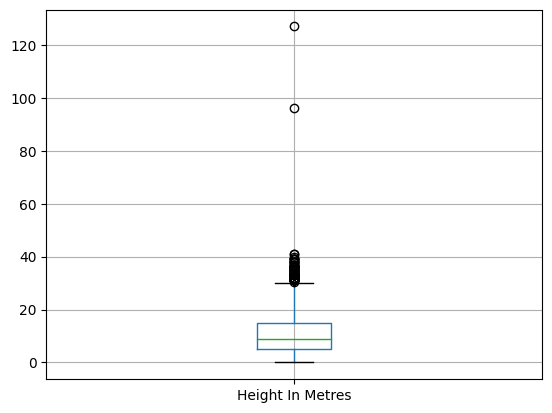

In [ ]:
# Use a boxplot to find the outliers
trees.boxplot(column="Height In Metres")

In [ ]:
# Select the crazy outlier rows
mask= trees['Height In Metres'] > 50

In [ ]:
trees[mask]

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
1356,00001547,1.0,Beaumont Walk Estate,Housing,Robinia pseudoacacia,2017-05-23,2020/2021,96.0,10.0,63.0,E05000136,Haverstock,527847,184391,-0.157739,51.543941,"(51.543941, -0.157739)"
1863,00013862,1.0,Maitland Park Estate 1,Housing,Prunus avium,2017-05-16,2020/2021,127.0,9.0,34.0,E05000136,Haverstock,527987,184901,-0.155534,51.548497,"(51.548497, -0.155534)"


<hr/>

### 5.2 Outliers for Spread
Now repeat the analysis for spread.


<Axes: >

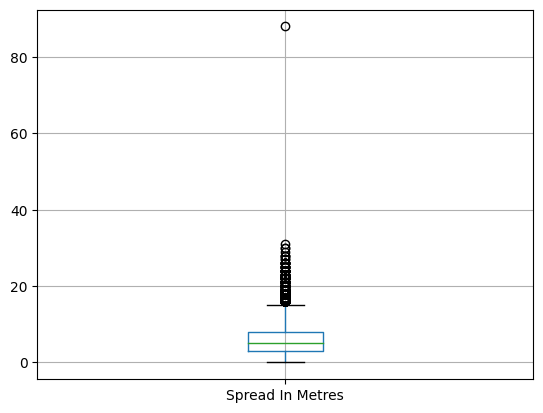

In [ ]:
# Use a boxplot to find the outliers
trees.boxplot(column="Spread In Metres")

In [ ]:
# Select the crazy outlier rows (if any)
mask = trees['Spread In Metres'] >40

In [ ]:
trees[mask]

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
18567,00045515,1.0,Broadfield Estate 1,Housing,Quercus robur,2018-04-26,2021/2022,8.0,88.0,17.0,E05000144,Swiss Cottage,525993,184693,-0.184348,51.547074,"(51.547074, -0.184348)"


<hr/>

### 5.3 Outliers for Diameter
Now repeat the analysis for diameter.


<Axes: >

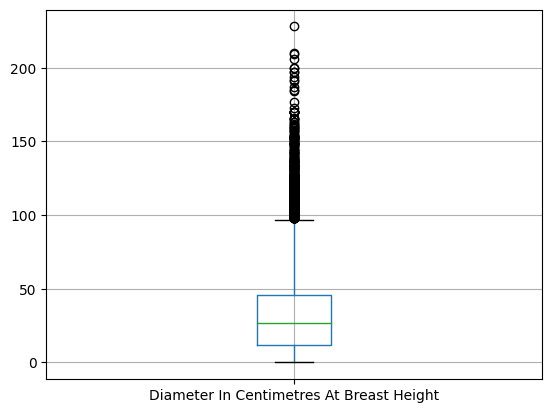

In [ ]:
# Use a boxplot to find the outliers
trees.boxplot(column="Diameter In Centimetres At Breast Height")

In [ ]:
# Select the outlier rows (if any)
maks = trees['Diameter In Centimetres At Breast Height'] >220


In [ ]:
trees[mask]

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
18567,00045515,1.0,Broadfield Estate 1,Housing,Quercus robur,2018-04-26,2021/2022,8.0,88.0,17.0,E05000144,Swiss Cottage,525993,184693,-0.184348,51.547074,"(51.547074, -0.184348)"


### Outliers in Trees df:
**Height in meters**
I have chosen to filter any values above 50 even though we have more outliers above the 100th centile. The values abouve 50m in Height seem extreem for the location and type of trees. However, the outliers (total 91) between the 100th centile and 44m are all "Platanus x hispanica" which explains the extreem height.

**Spread in meters**

I have chosen to filter values above 40m because this looks like extreem measures for trees in the particular geographical area. Comparing the data with our extreem values in Height in meters the data are the same.Also, of the outliers (total 722) between the 100th centile and 33m the majority are "Platanus x hispanica" which explains the extreem spread.

**Diameter In Centimetres At Breast Height**

I have chosen to filter values above 200cm because this looks like extreem measures for trees in the particular geographical area. Comparing the data with our extreem values in Height in meters the data are the same.

**In all above cases the extreme outliers will be excluded from our analysis**.

<hr/>

### 5.4 Observations




ENTER MARKDOWN HERE

<hr/>

## Task 6: Identify Duplicates in the Trees Dataset
Sometimes data has duplicate entries.  This is another sign of data quality issues!

### 6.1 Find Duplicate Rows

In our dataset the `Identifier` column should be unique.  Find out if it is!  We've already used a function that can count how many times each value in a column exists.  Use is to see if we have duplicates in the trees Dataframe.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [ ]:
# Find out if we have any duplicates
mask=trees.Identifier.duplicated().sum()

In [ ]:
print(mask)

In [ ]:
print(trees.duplicated(subset='Identifier'))

0        False
1        False
2        False
3        False
4        False
         ...  
23439    False
23440    False
23441    False
23442    False
23443    False
Length: 23444, dtype: bool


Now see if you can select the rows from trees DataFrame that are duplicates.  You will need to use the output from the cell above and use it to filter the trees dataframe.

In [ ]:
# Select the rows that are duplicated
id_counts = trees["Identifier"].value_counts()
id_counts[id_counts>1]

00000999    2
00060087    2
00022744    2
00032549    2
00022674    2
00060088    2
Name: Identifier, dtype: int64

In [ ]:

mask = trees["Identifier"].isin(id_counts[id_counts>1].index)
trees[mask]

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
1219,00060088,1.0,FREDERICK STREET,Highways,Vacant Tree Pit (planned: Access),2019-11-09,2022/2023,NaN,NaN,NaN,E05000141,King's Cross,530770,182696,-0.116241,51.528046,"(51.528046, -0.116241)"
4388,00032549,1.0,NARCISSUS ROAD,Highways,Betula albosinensis Fasc.,2018-09-19,2021/2022,9.0,6.0,19.0,E05000145,West Hampstead,525185,185127,-0.195840,51.551159,"(51.551159, -0.19584)"
5491,00000999,1.0,ALMA STREET,Highways,Sorbus hupehensis,2017-07-25,2020/2021,5.0,4.0,18.0,E05000139,Kentish Town,528834,184856,-0.143337,51.547904,"(51.547904, -0.143337)"
6111,00032549,1.0,NARCISSUS ROAD,Highways,Betula albosinensis Fasc.,2018-09-19,2021/2022,9.0,6.0,19.0,E05000145,West Hampstead,525185,185127,-0.195840,51.551159,"(51.551159, -0.19584)"
7027,00022744,1.0,YORK WAY,Highways,Ailanthus altissima,2019-10-30,2022/2023,7.5,3.0,18.0,E05000131,Cantelowes,529983,184724,-0.126837,51.546447,"(51.546447, -0.126837)"
9186,00022744,1.0,YORK WAY,Highways,Ailanthus altissima,2019-10-30,2022/2023,7.5,3.0,18.0,E05000131,Cantelowes,529983,184724,-0.126837,51.546447,"(51.546447, -0.126837)"
9482,00022674,1.0,WOODSOME ROAD,Highways,Sorbus,2017-10-07,2020/2021,7.0,6.0,28.0,E05000137,Highgate,528515,186109,-0.147481,51.559237,"(51.559237, -0.147481)"
10972,00060088,1.0,FREDERICK STREET,Highways,Vacant Tree Pit (planned: Acer campestre eco s...,2019-11-09,2022/2023,NaN,NaN,NaN,E05000141,King's Cross,530770,182696,-0.116241,51.528046,"(51.528046, -0.116241)"
13098,00000999,1.0,ALMA STREET,Highways,Sorbus hupehensis,2017-07-25,2020/2021,5.0,4.0,18.0,E05000139,Kentish Town,528834,184856,-0.143337,51.547904,"(51.547904, -0.143337)"
13628,00022674,1.0,WOODSOME ROAD,Highways,Sorbus,2017-10-07,2020/2021,7.0,6.0,28.0,E05000137,Highgate,528515,186109,-0.147481,51.559237,"(51.559237, -0.147481)"


<hr/>

### 6.2 Observations

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Write down your observations about duplicates in trees.
    </font></div>


ENTER MARKDOWN HERE

<hr/>

## Task 7: Identify Geolocation Issues
The geographic coordinates (Easting and Northing) can be used to plot the trees on a map.  We can use this approach to see if there are any unusual tree locations!

We will make a copy of the original trees dataset and remove any rows that have a missing easting or northing as these can't be plotted on the map.

We can copy the DataFrame using:

- [pandas.DataFrame.copy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html)

We can use the DataFrame filtering technique we saw before to remove the missing values.  E.g. the following code filters out rows where the value for 'mycolumn' is 100:

    mask = df['mycolumn'] != 100
    df = df[mask]

You can also create masks using a function, e.g. this creates a mask which excludes nulls:

    mask = df['mycolumn'].isnull()

We can use this function to plot the trees on a map. Set x to "Easting" and y to "Northing" and set a figsize parameter to (6, 6) to get a square aspect ratio:

- [pandas.DataFrame.plot.scatter](https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html)




### 7.1 Remove Trees with Missing Geo-coordinates
Check if there are any rows with null or 0 geo-coordinates.  If there are, remove them as we can't plot these.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [ ]:
# Make a copy of the trees
geotrees = trees.copy()

In [ ]:
# Remove null Eastings


From count earlier we know we do not have any nulls, only 0s.

In [ ]:
# Remove 0 Eastings.
mask = geotrees['Easting'] !=0

In [ ]:
mask

0         True
1         True
2        False
3         True
4         True
         ...  
23439     True
23440     True
23441     True
23442     True
23443     True
Name: Easting, Length: 23444, dtype: bool

In [ ]:
geotrees = geotrees[mask]
geotrees.shape

(23388, 17)

In [ ]:
# Remove null Northings

From count earlier we know we do not have any nulls, only 0s.

In [ ]:
# Remove 0 Northings.
mask = geotrees['Northing'] !=0

In [ ]:
geotrees.shape

(23388, 17)

In [ ]:
# Confirm how many rows we have
mask.shape

(23388,)

<hr/>

### 7.2 Plot Map of Trees
Now make the plot.  Do a scatter plot of Northing vs Easting. You should obtain an outline of the map of Camden. Compare that outline with a real map of Camden (use good old google maps!). You’ll be able to spot the trees that should not be in that dataset from there!

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cell
    </font></div>

<Axes: xlabel='Easting', ylabel='Northing'>

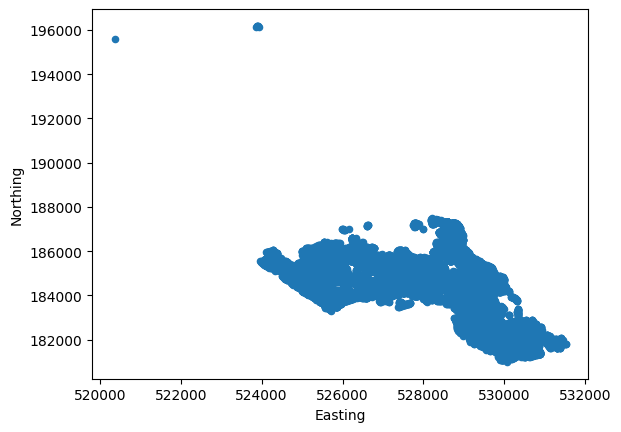

In [ ]:
# Plot the trees on a map
geotrees.plot.scatter(x='Easting', y='Northing')

### 7.3 Find Trees Outside Camden
From the scatter plot, you should be able to determine how to select the rows from the trees data set containing the offending trees (using the Easting and Northing values)

Select the rows containing trees outside of Camden.  Use the filter technique again.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [ ]:
mask = geotrees['Northing'] < 194000
geotrees[mask]

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
0,00060053,1.0,Russell Nurseries Estate,Housing,Vacant Tree Pit,NaT,NaN,NaN,NaN,NaN,E05000135,Hampstead Town,527305,185240,-0.165240,51.551693,"(51.551693, -0.16524)"
1,00057855,1.0,BRECKNOCK JMI (E),Education,Vacant Tree Pit,2019-07-17,2022/2023,NaN,NaN,NaN,E05000131,Cantelowes,529923,184782,-0.127681,51.546984,"(51.546984, -0.127681)"
3,00059915,1.0,ROSARY RC JMI (E),Education,Betula jacquemontii,NaT,NaN,4.0,1.0,6.0,E05000135,Hampstead Town,527249,185261,-0.166051,51.551901,"(51.551901, -0.166051)"
4,00010762,1.0,Holly Lodge Estate,Housing,Ilex x altaclarensis,2017-06-14,2020/2021,14.0,6.0,26.0,E05000137,Highgate,528414,186770,-0.148704,51.565198,"(51.565198, -0.148704)"
5,00007523,1.0,Westcroft Estate 1,Housing,Betula pendula,2018-08-06,2021/2022,9.0,7.0,29.0,NaN,NaN,524253,185982,-0.208975,51.559049,"(51.559049, -0.208975)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23439,00057455,1.0,"KILBURN GRANGE, MESSINA AVE (LS)",Parks,Sorbus aria,2017-03-28,2019/2020,2.0,1.0,6.0,E05000140,Kilburn,525130,184418,-0.196884,51.544796,"(51.544796, -0.196884)"
23440,00015494,1.0,OSSULSTON STREET,Highways,Sorbus aria 'Majestica',2019-10-28,2022/2023,12.0,6.0,48.0,E05000143,St Pancras and Somers Town,529758,183095,-0.130667,51.531863,"(51.531863, -0.130667)"
23441,00001693,1.0,BELMONT STREET,Highways,Platanus x hispanica,2017-07-31,2020/2021,18.0,10.0,57.0,E05000136,Haverstock,528302,184457,-0.151163,51.544432,"(51.544432, -0.151163)"
23442,00020342,1.0,Templar House Estate,Housing,Tilia europaea,2018-11-05,2021/2022,20.0,8.0,40.0,E05000132,Fortune Green,524615,184714,-0.204206,51.547573,"(51.547573, -0.204206)"


In [ ]:
# Confirm how many rows we have
geotrees[mask].shape

(23380, 17)

<Axes: xlabel='Easting', ylabel='Northing'>

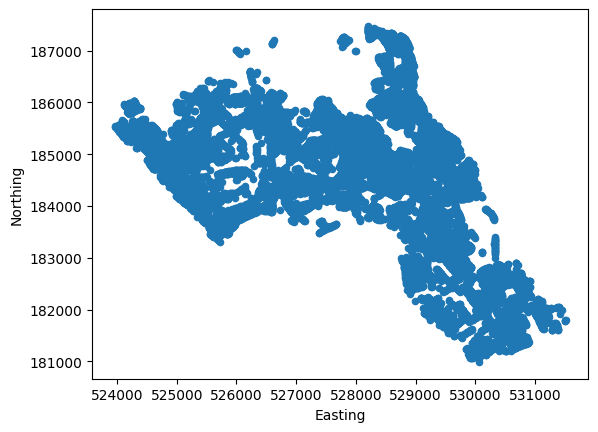

In [ ]:
geotrees[mask].plot.scatter(x='Easting', y='Northing')

<hr/>

### 7.4 Observations




Dased on the geological ingformation and our scatterplot, it looks like we have some trees outside of Camden Borough.  Ones those are excluded, we can use the updated information for the walks brochure and the open data initiative.

<hr/>

## Task 8: Identify Unmatched Data
We have multiple datasets that will need to be joined together to produce the analyses required by the Camden Parks and Open Spaces team.  The data will need to be joined in the following way:

- Use the `Identifier` column in the trees dataset to match to the `Identifier` column in the environmental data set (so we can bring in the environmental data for each tree)
- Use the `Scientific Name` column in the trees dataset to match to the `Scientific Name` column in the common names data set (so we can look up the `Common Name`)

There may be mismatches in the data.  Of particular concern we want to check

- That every tree in the trees dataset has matching environmental data in the environmental data set
- That every environmental row in the environmental dataset has matching tree data in the tree data set
- That every scientific name in the trees dataset has a matching common name in the common names data set

We aren't too concerned about the reverse of the last scenario (if we have extra names in the common names dataset that aren't in the trees data set).  We don't expect Camden to have a specimen of every tree that exists!  

There are a few ways this can be done, but one technique is to use the `isin` function to check if some column in one dataframe contains values that are in another column in another dataframe.  This creates a mask containing rows that match between the two dataframes:

    mask = df1['column_name1'].isin(df2['column_name2'])
    
To select the non-matching rows, we can use Python's bitwise not operator ~:

    mask = ~df1['column_name1'].isin(df2['column_name2'])
    
As we have seen before, the mask can be used to select that subset of rows back from the original dataframe.

### 8.1 Find Trees that Don't have Matching Environmental Data


In [ ]:
mask = trees["Identifier"].isin(environmental["Identifier"])
trees[mask]

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
0,00060053,1.0,Russell Nurseries Estate,Housing,Vacant Tree Pit,NaT,NaN,NaN,NaN,NaN,E05000135,Hampstead Town,527305,185240,-0.165240,51.551693,"(51.551693, -0.16524)"
1,00057855,1.0,BRECKNOCK JMI (E),Education,Vacant Tree Pit,2019-07-17,2022/2023,NaN,NaN,NaN,E05000131,Cantelowes,529923,184782,-0.127681,51.546984,"(51.546984, -0.127681)"
2,00059953,1.0,Estate 51 Ravenshaw Street,Housing,Ficus carica,NaT,NaN,5.0,4.0,10.0,NaN,NaN,0,0,NaN,NaN,NaN
3,00059915,1.0,ROSARY RC JMI (E),Education,Betula jacquemontii,NaT,NaN,4.0,1.0,6.0,E05000135,Hampstead Town,527249,185261,-0.166051,51.551901,"(51.551901, -0.166051)"
4,00010762,1.0,Holly Lodge Estate,Housing,Ilex x altaclarensis,2017-06-14,2020/2021,14.0,6.0,26.0,E05000137,Highgate,528414,186770,-0.148704,51.565198,"(51.565198, -0.148704)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23439,00057455,1.0,"KILBURN GRANGE, MESSINA AVE (LS)",Parks,Sorbus aria,2017-03-28,2019/2020,2.0,1.0,6.0,E05000140,Kilburn,525130,184418,-0.196884,51.544796,"(51.544796, -0.196884)"
23440,00015494,1.0,OSSULSTON STREET,Highways,Sorbus aria 'Majestica',2019-10-28,2022/2023,12.0,6.0,48.0,E05000143,St Pancras and Somers Town,529758,183095,-0.130667,51.531863,"(51.531863, -0.130667)"
23441,00001693,1.0,BELMONT STREET,Highways,Platanus x hispanica,2017-07-31,2020/2021,18.0,10.0,57.0,E05000136,Haverstock,528302,184457,-0.151163,51.544432,"(51.544432, -0.151163)"
23442,00020342,1.0,Templar House Estate,Housing,Tilia europaea,2018-11-05,2021/2022,20.0,8.0,40.0,E05000132,Fortune Green,524615,184714,-0.204206,51.547573,"(51.547573, -0.204206)"


In [ ]:
# Find trees that don't have matching environmental data
mask = ~trees["Identifier"].isin(environmental["Identifier"])
trees[mask]

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
66,00059712,1.0,Maiden Lane Estate,Housing,Acer saccharinum,2019-05-28,2022/2023,12.0,5.0,20.0,E05000131,Cantelowes,529795,184142,-0.129750,51.541266,"(51.541266, -0.12975)"
125,00048578,1.0,BUCK STREET,Highways,Sorbus aucuparia,2017-07-19,2020/2021,6.0,2.0,10.0,E05000130,Camden Town with Primrose Hill,528900,184020,-0.142698,51.540371,"(51.540371, -0.142698)"
1148,00006577,1.0,FAWLEY ROAD,Highways,Tilia euchlora,2018-09-28,2021/2022,15.0,6.0,38.0,E05000145,West Hampstead,525572,185015,-0.190313,51.550062,"(51.550062, -0.190313)"
1998,00007366,1.0,"FORTUNE GREEN RD, OPEN SPACE (LS)",Parks,Ilex aquifolium,2017-03-21,2019/2020,9.0,6.0,44.0,E05000132,Fortune Green,525074,185541,-0.197304,51.554901,"(51.554901, -0.197304)"
2246,00014633,1.0,Mortimer Estate,Housing,Tilia europaea,2019-01-29,2021/2022,16.0,12.0,47.0,E05000140,Kilburn,525763,183613,-0.188060,51.537424,"(51.537424, -0.18806)"
5478,00060382,1.0,SHAFTESBURY AVENUE,Highways,Vacant Tree Pit,NaT,NaN,NaN,NaN,NaN,E05000138,Holborn and Covent Garden,530073,181247,-0.126813,51.515186,"(51.515186, -0.126813)"
10637,00002874,1.0,BURGHLEY ROAD,Highways,Platanus x hispanica,2017-08-14,2020/2021,20.0,8.0,52.0,E05000139,Kentish Town,529119,185889,-0.138863,51.557120,"(51.55712, -0.138863)"
10977,00055227,1.0,BURGHLEY ROAD,Highways,Amelanchier lamarckii,2017-08-14,2020/2021,3.0,2.0,5.0,E05000139,Kentish Town,528920,185694,-0.141802,51.555408,"(51.555408, -0.141802)"
11795,00016702,1.0,"RED LION SQUARE, GARDENS (LS)",Parks,Platanus x hispanica,2018-06-04,2021/2022,30.0,23.0,165.0,E05000138,Holborn and Covent Garden,530572,181701,-0.119460,51.519146,"(51.519146, -0.11946)"
11856,00054744,1.0,Carrol & Sanderson Close Estate,Housing,Prunus unidentified species,2017-01-06,2020/2021,3.0,3.0,13.0,E05000137,Highgate,528661,185556,-0.145585,51.554226,"(51.554226, -0.145585)"


In [ ]:
# Confirm how many rows we have
mask.shape

(23444,)

### 8.2 Find Environmental Data that Doesn't have Matching Tree Data


In [ ]:
# Find environmental data that doesn't have matching tree data
mask = ~environmental["Identifier"].isin(trees["Identifier"])
environmental[mask]


,Identifier,Maturity,Physiological Condition,Tree Set To Be Removed,Removal Reason,Capital Asset Value For Amenity Trees,Carbon Storage In Kilograms,Gross Carbon Sequestration Per Year In Kilograms,Pollution Removal Per Year In Grams


In [ ]:
# Confirm how many rows we have
environmental[mask].shape

(0, 9)

### 8.3 Find Trees that Don't have Matching Common Names Data


In [ ]:
# Find trees with scientific names that don't have matching common names data

mask = ~trees["Scientific Name"].isin(names["Scientific Name"])
trees[mask]


,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
151,00051832,1.0,ARGYLE WALK,Highways,Sorbus aucuparia 'Streetwise',2019-02-10,2022/2023,7.0,3.0,12.0,E05000141,King's Cross,530227,182706,-0.124054,51.528257,"(51.528257, -0.124054)"
384,00053954,1.0,CHURCHILL ROAD,Highways,Sorbus aucuparia 'Streetwise',2017-10-07,2020/2021,3.0,2.0,5.0,E05000139,Kentish Town,529007,185975,-0.140440,51.557913,"(51.557913, -0.14044)"
495,00047497,1.0,PATSHULL PLACE,Highways,Sorbus aucuparia 'Streetwise',2017-06-22,2020/2021,5.0,3.0,11.0,E05000131,Cantelowes,529202,184717,-0.138094,51.546569,"(51.546569, -0.138094)"
611,00055434,1.0,SHARPLES HALL STREET,Highways,Sorbus aucuparia 'Streetwise',2019-09-30,2022/2023,2.0,2.0,4.0,E05000130,Camden Town with Primrose Hill,527962,184050,-0.156202,51.540853,"(51.540853, -0.156202)"
653,00055289,1.0,QUEEN'S CRESCENT,Highways,Sorbus aucuparia 'Streetwise',2017-07-08,2020/2021,4.0,1.0,7.0,E05000136,Haverstock,528072,184723,-0.154369,51.546881,"(51.546881, -0.154369)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21826,00050835,1.0,INGESTRE RD,Highways,Sorbus aucuparia 'Streetwise',2017-08-18,2020/2021,3.0,1.0,7.0,E05000139,Kentish Town,528962,185826,-0.141137,51.556589,"(51.556589, -0.141137)"
22948,00052341,1.0,NEW COMPTON STREET,Highways,Sorbus aucuparia 'Streetwise',2019-07-08,2022/2023,4.0,3.0,6.0,E05000138,Holborn and Covent Garden,529976,181160,-0.128249,51.514422,"(51.514422, -0.128249)"
23266,00048846,1.0,ASMARA ROAD,Highways,Sorbus aucuparia 'Streetwise',2018-08-28,2021/2022,5.0,3.0,8.0,E05000132,Fortune Green,524568,185347,-0.204661,51.553268,"(51.553268, -0.204661)"
23335,00048705,1.0,GOLDINGTON STREET,Highways,Sorbus aucuparia 'Streetwise',2019-10-23,2022/2023,6.0,2.0,12.0,E05000143,St Pancras and Somers Town,529662,183417,-0.131941,51.534780,"(51.53478, -0.131941)"


<hr/>

### 8.4 Observations



When we merged the tables "Trees" and "Environmental", we confirmed that 23421 observations have matching environmetantal data and that all environmetal data have matching trees data. We also found 76 observatsions without common name.

<hr/>

# END OF NOTEBOOK